# 서울시 구별 인구 현황
### 서울시 통계DB
- http://stat.seoul.go.kr/jsp3/index.jsp
> 과제
- 서울에서 인구가 가장 많은 지역과 적은 지연은?
- 우리나라의 저출산,고령화가 문제한데, 가장 심각한 지역은 어디일까?
- 1인가구수도 늘어나는데, 가장 많은지역은? 그리고 인구수와 세대수는 비례할까?
- 고령인구가 가장 많은 지역은 어디일까? 그리고 그지역의 고령비율도 높을까?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [7]:
from IPython.display import Image
    
seoul_map      = 'images/seoul_map.png'
# population_img = 'images/Report_seoul_population_2022_1Q.png'
population_xls = './data/Report_seoul_population_2022_1Q.xls'
population_txt = './data/Report_seoul_population_2022_1Q.txt'
# population_hml = './data/Report_seoul_population_2022_1Q.hml'

In [9]:
population_df = pd.read_table(population_txt, header=2) # header = 2 (0,1,2)니까 3번째부터 변수
population_df.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2022.1/4,합계,"4,451,444","9,732,617","4,716,704","5,015,913","9,506,778","4,613,910","4,892,868","225,839","102,794","123,045",2.14,"1,628,980"
1,2022.1/4,종로구,"73,766","153,684","74,018","79,666","144,275","69,911","74,364","9,409","4,107","5,302",1.96,"28,064"
2,2022.1/4,중구,"63,767","131,450","63,869","67,581","122,173","59,448","62,725","9,277","4,421","4,856",1.92,"24,742"
3,2022.1/4,용산구,"111,207","236,518","114,571","121,947","222,169","106,735","115,434","14,349","7,836","6,513",2.00,"39,461"
4,2022.1/4,성동구,"134,533","291,609","141,662","149,947","285,073","138,847","146,226","6,536","2,815","3,721",2.12,"46,896"


In [12]:
population = population_df[['자치구','세대','계','세대당인구','65세이상고령자']]
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,"4,451,444","9,732,617",2.14,"1,628,980"
1,종로구,"73,766","153,684",1.96,"28,064"
2,중구,"63,767","131,450",1.92,"24,742"
3,용산구,"111,207","236,518",2.00,"39,461"
4,성동구,"134,533","291,609",2.12,"46,896"


In [13]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   세대        26 non-null     object 
 2   계         26 non-null     object 
 3   세대당인구     26 non-null     float64
 4   65세이상고령자  26 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


In [14]:
tmp = population['세대'][0].replace(',','')
tmp

'4451444'

In [15]:
population.iloc[0]['세대']

'4,451,444'

In [21]:
for idx in population.index:
    tmp = population['계'][idx].replace(',','')
    population['계'][idx] = tmp

C:\Users\student\AppData\Local\Temp\ipykernel_10232\1197508938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['계'][idx] = tmp


In [16]:
for idx in population.index:
    tmp = population['세대'][idx].replace(',','')
    population['세대'][idx] = tmp

C:\Users\student\AppData\Local\Temp\ipykernel_10232\3695219241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['세대'][idx] = tmp


In [17]:
for idx in population.index:
    tmp = population['65세이상고령자'][idx].replace(',','')
    population['65세이상고령자'][idx] = tmp

C:\Users\student\AppData\Local\Temp\ipykernel_10232\3773384742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['65세이상고령자'][idx] = tmp


In [18]:
for idx in population.index:
    tmp = population['계'][idx]
    print(tmp, end = ' \t--> ')
    tmp = tmp.replace(',','')
    print(tmp, type(tmp))
    population['계'][idx] = tmp

9,732,617 	--> 9732617 <class 'str'>
153,684 	--> 153684 <class 'str'>
131,450 	--> 131450 <class 'str'>
236,518 	--> 236518 <class 'str'>
291,609 	--> 291609 <class 'str'>
353,110 	--> 353110 <class 'str'>
352,592 	--> 352592 <class 'str'>
393,600 	--> 393600 <class 'str'>
442,680 	--> 442680 <class 'str'>
300,824 	--> 300824 <class 'str'>
318,100 	--> 318100 <class 'str'>
514,445 	--> 514445 <class 'str'>
476,013 	--> 476013 <class 'str'>
317,075 	--> 317075 <class 'str'>
378,629 	--> 378629 <class 'str'>
449,378 	--> 449378 <class 'str'>
578,426 	--> 578426 <class 'str'>


C:\Users\student\AppData\Local\Temp\ipykernel_10232\1570461996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['계'][idx] = tmp


419,984 	--> 419984 <class 'str'>
244,901 	--> 244901 <class 'str'>
400,241 	--> 400241 <class 'str'>
394,649 	--> 394649 <class 'str'>
500,336 	--> 500336 <class 'str'>
413,677 	--> 413677 <class 'str'>
537,338 	--> 537338 <class 'str'>
668,261 	--> 668261 <class 'str'>
465,097 	--> 465097 <class 'str'>


In [19]:
population['세대'] = population['세대'].astype('int64')  # 문자를 숫자로 변환 시, astype('int64')

C:\Users\student\AppData\Local\Temp\ipykernel_10232\789562076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['세대'] = population['세대'].astype('int64')


In [20]:
population['65세이상고령자'] = population['65세이상고령자'].astype('int64')

C:\Users\student\AppData\Local\Temp\ipykernel_10232\1820544362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['65세이상고령자'] = population['65세이상고령자'].astype('int64')


In [22]:
population['계'] = population['계'].astype('int64')

C:\Users\student\AppData\Local\Temp\ipykernel_10232\1343656151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['계'] = population['계'].astype('int64')


###### 데이터 검증 (숫자 변환)

In [26]:
population['세대'][1]

73766

In [27]:
population['계'][1]

153684

In [28]:
population['65세이상고령자'][1]

28064

In [29]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   세대        26 non-null     int64  
 2   계         26 non-null     int64  
 3   세대당인구     26 non-null     float64
 4   65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


### excel 파일 읽어오기

In [40]:
population = pd.read_excel(population_xls,
                          header = 2,
                          usecols = 'B ,C ,D ,M ,N'   #######################################
                          )
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4451444,9732617,2.14,1628980
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896


In [41]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   세대        26 non-null     int64  
 2   계         26 non-null     int64  
 3   세대당인구     26 non-null     float64
 4   65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [42]:
# 합계 제거!!!!
population = population.drop([0])
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896
5,광진구,169483,353110,2.01,52604
6,동대문구,169695,352592,1.99,62963
7,중랑구,187693,393600,2.07,72851
8,성북구,197296,442680,2.20,75719
9,강북구,144725,300824,2.05,64961
10,도봉구,138836,318100,2.28,65122


In [43]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [44]:
population.rename(columns = {'계' : '인구수'}, inplace = True)
population.rename(columns = {'자치구' : '구'}, inplace = True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896
5,광진구,169483,353110,2.01,52604


<AxesSubplot:xlabel='인구수', ylabel='세대'>

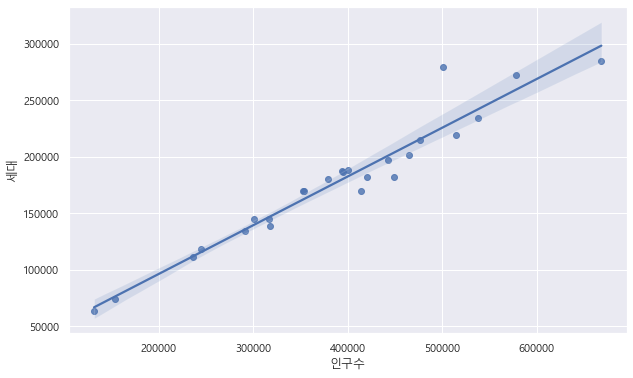

In [45]:
sns.regplot(x = '인구수', y = '세대', data = population)

<AxesSubplot:xlabel='인구수', ylabel='65세이상고령자'>

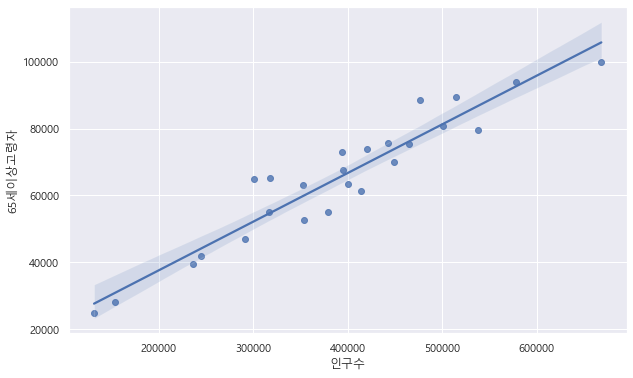

In [46]:
sns.regplot(x = '인구수', y = '65세이상고령자', data = population)

In [47]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [48]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [49]:
guDat = pd.DataFrame({'gu' : population['구'], 'counts' : population['인구수']})
guDat.head()

,gu,counts
1,종로구,153684
2,중구,131450
3,용산구,236518
4,성동구,291609
5,광진구,353110


In [50]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [51]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = guDat,
              columns = ['gu','counts'],
              fill_color = 'YlGnBu',
              key_on = 'feature.id'
              )

In [52]:
map

In [67]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = guDat,
              columns = ['gu','counts'],
              fill_color = 'PuRd',
              key_on = 'feature.id'
              )

In [68]:
map

In [69]:
gu_Dat = pd.DataFrame({'gu' : population['구'], 'counts' : population['65세이상고령자']})

map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = guDat,
              columns = ['gu','counts'],
              fill_color = 'PuRd',
              key_on = 'feature.id'
              )
map

In [71]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [72]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,종로구,73766,153684,1.96,28064,18.260847
2,중구,63767,131450,1.92,24742,18.822366
3,용산구,111207,236518,2.00,39461,16.684142
4,성동구,134533,291609,2.12,46896,16.081808
5,광진구,169483,353110,2.01,52604,14.897341


In [73]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [74]:
population.sort_values(by = '65세이상고령자', ascending = False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
24,송파구,285106,668261,2.32,99854,14.942365
16,강서구,272572,578426,2.10,93924,16.237859
11,노원구,219065,514445,2.33,89426,17.383005
12,은평구,215178,476013,2.19,88418,18.574703
21,관악구,279353,500336,1.74,80686,16.126363


In [75]:
population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')